In [186]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [187]:
iris_df = pd.read_csv('iris.csv')

iris_df.info()
print(iris_df.isnull().sum())
iris_df = iris_df.dropna()

# Examinar os primeiros registros para entender a estrutura dos dados
print(iris_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [188]:
# Dividir os dados em conjuntos de treinamento e teste
X = iris_df.drop('species', axis=1)  # Features
y = iris_df['species']  # Alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamanho do conjunto de treinamento:", X_train.shape[0])
print("Tamanho do conjunto de teste:", X_test.shape[0])

Tamanho do conjunto de treinamento: 105
Tamanho do conjunto de teste: 45


In [189]:
X_train_unnormalized = X_train
X_test_unnormalized = X_test

print("Dados de características sem normalização:")
print(X_train_unnormalized)

Dados de características sem normalização:
     sepal_length  sepal_width  petal_length  petal_width
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[105 rows x 4 columns]


In [190]:
scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

print("Dados de características normalizados:")
print(X_train_normalized[:10])

Dados de características normalizados:
[[-0.4134164  -1.46440146 -0.10014569 -0.32149987]
 [ 0.55122187 -0.49582097  0.71771076  0.35364985]
 [ 0.67180165  0.2306144   0.95138404  0.75873969]
 [ 0.91296121 -0.01153072  0.30878254  0.21861991]
 [ 1.63643991  1.44134002  1.30189395  1.7039493 ]
 [-0.17225683 -0.25367584  0.1919459   0.08358997]
 [ 2.11875905 -0.01153072  1.59398554  1.16382952]
 [-0.29283662 -0.01153072  0.36720086  0.35364985]
 [-0.89573553  1.19919489 -1.443767   -1.40173942]
 [ 2.23933883 -0.49582097  1.65240385  1.02879957]]


In [191]:
# Dados sem balanceamento

print(y_train.value_counts())

species
versicolor    37
virginica     37
setosa        31
Name: count, dtype: int64


In [192]:
# Balanceando os dados
smote = SMOTE(random_state=42)
X_train_balanceado, y_train_balanceado = smote.fit_resample(X_train, y_train)
print(y_train_balanceado.value_counts())

species
versicolor    37
virginica     37
setosa        37
Name: count, dtype: int64


In [193]:
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
previsoes = modelo.predict(X_test)
acuracia = accuracy_score(y_test, previsoes)
print("Acurácia do modelo desbalanceado:", acuracia)

Acurácia do modelo desbalanceado: 1.0


In [194]:
modelo_balanceado = LogisticRegression()
modelo_balanceado.fit(X_train_balanceado, y_train_balanceado)
previsoes_balanceadas = modelo_balanceado.predict(X_test)
acuracia_balanceada = accuracy_score(y_test, previsoes_balanceadas)
print("Acurácia do modelo balanceado:", acuracia_balanceada)

Acurácia do modelo balanceado: 1.0


C:\Users\1-22-10795\AppData\Local\Temp\ipykernel_7404\701310671.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_train_normalized[y_train_encoded == i, feature1_index],


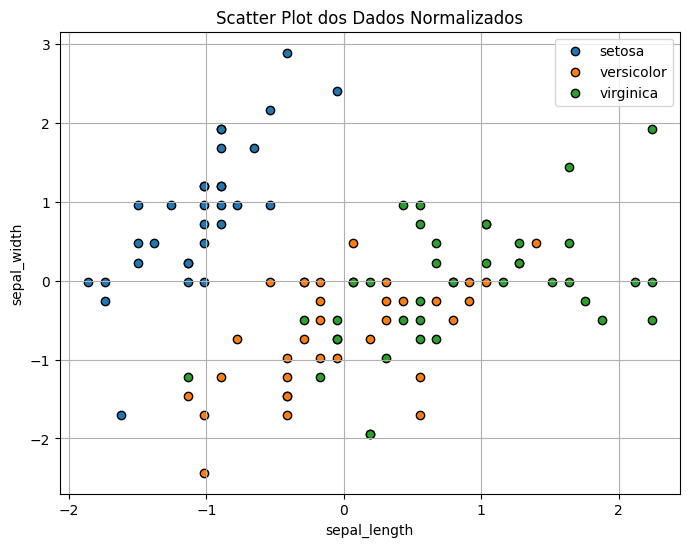

In [206]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Mapear os valores numéricos das classes de destino para os nomes das espécies
species_names = le.classes_

# Escolha duas características para o scatter plot
feature1_index = 0 
feature2_index = 1 

# Criar um scatter plot com os dados normalizados
plt.figure(figsize=(8, 6))
for i, species in enumerate(species_names):
    plt.scatter(X_train_normalized[y_train_encoded == i, feature1_index], 
                X_train_normalized[y_train_encoded == i, feature2_index], 
                label=species,
                cmap='viridis', edgecolor='k')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Scatter Plot dos Dados Normalizados')
plt.legend()
plt.grid(True)
plt.show()
